<b><h2>1. Import Module</h2></b>

In [31]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer, Flatten, Dense, Conv2D, MaxPool2D, Dropout
from tensorflow.keras.optimizers import Adam
import numpy as np
import cv2
import glob
import matplotlib.pyplot as plt


In [32]:
# memanggil drive google
from google.colab import drive
drive.mount('/content/drives/')

Drive already mounted at /content/drives/; to attempt to forcibly remount, call drive.mount("/content/drives/", force_remount=True).


<b><h2>2. Load Dataset</h2></b>

In [33]:
imagePaths = '/content/drives/MyDrive/Uas/DatasetDaun'
label_list = ['Nangka', 'Daun Sirih']
data = []
labels = []

<b><h2>3. Data Preprocessing</h2></b>

In [34]:
for label in label_list:
    image_dir = imagePaths+'/'+label+'/*.jpg'
    print(f"Looking for images in: {image_dir}") # Add this line to print the path
    for imagePath in glob.glob(image_dir):
        #print(imagePath)
        image = cv2.imread(imagePath)
        image = cv2.resize(image, (32, 32))
        data.append(image)
        labels.append(label)

Looking for images in: /content/drives/MyDrive/Uas/DatasetDaun/Nangka/*.jpg
Looking for images in: /content/drives/MyDrive/Uas/DatasetDaun/Daun Sirih/*.jpg


In [35]:
np.array(data).shape


(102, 32, 32, 3)

In [36]:
# ubah type data dari list menjadi array
# ubah nilai dari tiap pixel menjadi range [0..1]
data = np.array(data, dtype='float') / 255.0
labels = np.array(labels)


In [37]:
print(labels)


['Nangka' 'Nangka' 'Nangka' 'Nangka' 'Nangka' 'Nangka' 'Nangka' 'Nangka'
 'Nangka' 'Nangka' 'Nangka' 'Nangka' 'Nangka' 'Nangka' 'Nangka' 'Nangka'
 'Nangka' 'Nangka' 'Nangka' 'Nangka' 'Nangka' 'Nangka' 'Nangka' 'Nangka'
 'Nangka' 'Nangka' 'Nangka' 'Nangka' 'Nangka' 'Nangka' 'Nangka' 'Nangka'
 'Nangka' 'Nangka' 'Nangka' 'Nangka' 'Nangka' 'Nangka' 'Nangka' 'Nangka'
 'Nangka' 'Nangka' 'Nangka' 'Nangka' 'Nangka' 'Nangka' 'Nangka' 'Nangka'
 'Nangka' 'Nangka' 'Nangka' 'Daun Sirih' 'Daun Sirih' 'Daun Sirih'
 'Daun Sirih' 'Daun Sirih' 'Daun Sirih' 'Daun Sirih' 'Daun Sirih'
 'Daun Sirih' 'Daun Sirih' 'Daun Sirih' 'Daun Sirih' 'Daun Sirih'
 'Daun Sirih' 'Daun Sirih' 'Daun Sirih' 'Daun Sirih' 'Daun Sirih'
 'Daun Sirih' 'Daun Sirih' 'Daun Sirih' 'Daun Sirih' 'Daun Sirih'
 'Daun Sirih' 'Daun Sirih' 'Daun Sirih' 'Daun Sirih' 'Daun Sirih'
 'Daun Sirih' 'Daun Sirih' 'Daun Sirih' 'Daun Sirih' 'Daun Sirih'
 'Daun Sirih' 'Daun Sirih' 'Daun Sirih' 'Daun Sirih' 'Daun Sirih'
 'Daun Sirih' 'Daun Sirih' 'Daun 

In [38]:
# ubah nilai dari labels menjadi binary
lb = LabelEncoder()
labels = lb.fit_transform(labels)
print(labels)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


<b><h2>4. Split Dataset</h2></b>

In [39]:
x_train, x_test, y_train, y_test = train_test_split(
    data, labels, test_size=0.2, random_state=42)

In [40]:
print('Ukuran data train =', x_train.shape)
print('Ukuran data test =', x_test.shape)


Ukuran data train = (81, 32, 32, 3)
Ukuran data test = (21, 32, 32, 3)


<b><h2>5. Build CNN Architecture</h2></b>

In [41]:
model = Sequential()
# Extracted Feature Layer
model.add(InputLayer(input_shape=[32, 32, 3]))
model.add(Conv2D(filters=32, kernel_size=2, strides=1,
          padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=2, padding='same'))
model.add(Conv2D(filters=50, kernel_size=2, strides=1,
          padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=2, padding='same'))
model.add(Dropout(0.25))
model.add(Flatten())
# Fully Connected Layer
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


In [42]:
model.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 32, 32, 32)     │           416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 16, 16, 50)     │         6,450 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 8, 8, 50)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 8, 8, 50)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 3200)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 512)            │     1,638,912 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │           513 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,646,291 (6.28 MB)

 Trainable params: 1,646,291 (6.28 MB)

 Non-trainable params: 0 (0.00 B)

In [43]:
# tentukan hyperparameter
lr = 0.001
max_epochs = 100
opt_funct = Adam(learning_rate=lr)


In [44]:
# compile arsitektur yang telah dibuat
model.compile(loss='binary_crossentropy',
              optimizer=opt_funct,
              metrics=['accuracy'])


<b><h2>6. Train Model</h2></b>

In [45]:
H = model.fit(x_train, y_train, validation_data=(x_test, y_test),
              epochs=max_epochs, batch_size=32)


Epoch 1/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 203ms/step - accuracy: 0.4953 - loss: 0.9028 - val_accuracy: 0.3810 - val_loss: 1.3479
Epoch 2/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 100ms/step - accuracy: 0.5496 - loss: 0.9058 - val_accuracy: 0.9048 - val_loss: 0.5570
Epoch 3/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step - accuracy: 0.6495 - loss: 0.6457 - val_accuracy: 0.7143 - val_loss: 0.5084
Epoch 4/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step - accuracy: 0.7840 - loss: 0.5230 - val_accuracy: 0.6667 - val_loss: 0.5777
Epoch 5/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step - accuracy: 0.6979 - loss: 0.4898 - val_accuracy: 0.8571 - val_loss: 0.4515
Epoch 6/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step - accuracy: 0.9021 - loss: 0.3766 - val_accuracy: 0.9048 - val_loss: 0.3361
Epoch 7/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step - accuracy: 0.9463 - loss: 0.3064 - val_accuracy: 0.8571 - val_loss: 0.2995
Epoch 8/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step - accuracy: 0.8959 - loss: 0.2319 - val_accuracy: 0.9048 - val_lo

4. Split Dataset

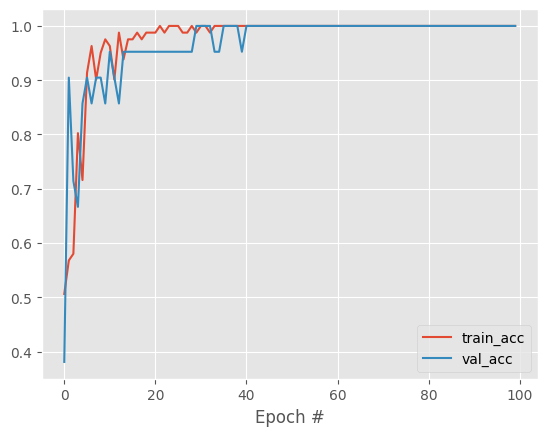

In [46]:
N = np.arange(0, max_epochs)
plt.style.use("ggplot")
plt.figure()
# plt.plot(N, H.history["loss"], label="train_loss")
# plt.plot(N, H.history["val_loss"], label="val_loss")
plt.plot(N, H.history["accuracy"], label="train_acc")
plt.plot(N, H.history["val_accuracy"], label="val_acc")
plt.xlabel("Epoch #")
plt.legend()
plt.show()


<b><h2>7. Evaluate the Model</h2></b>

In [47]:
# menghitung nilai akurasi model terhadap data test
predictions = model.predict(x_test, batch_size=32)
target = (predictions > 0.5).astype(int)
print(classification_report(y_test, target, target_names=label_list))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 153ms/step
              precision    recall  f1-score   support

      Nangka       1.00      1.00      1.00         8
  Daun Sirih       1.00      1.00      1.00        13

    accuracy                           1.00        21
   macro avg       1.00      1.00      1.00        21
weighted avg       1.00      1.00      1.00        21



<b><h2>8. Test Model</h2></b>

In [48]:
# uji model menggunakan image lain
queryPath = imagePaths+'/Daun Sirih/019.jpg' # Changed to Daun Sirih
query = cv2.imread(queryPath)
output = query.copy()
query = cv2.resize(query, (32, 32))
q = []
q.append(query)
q = np.array(q, dtype='float') / 255.0

q_pred = model.predict(q)

print(q_pred)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step
[[4.2853876e-06]]


<b><h2>9. Result</h2></b>

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
Daun Nangka Test:


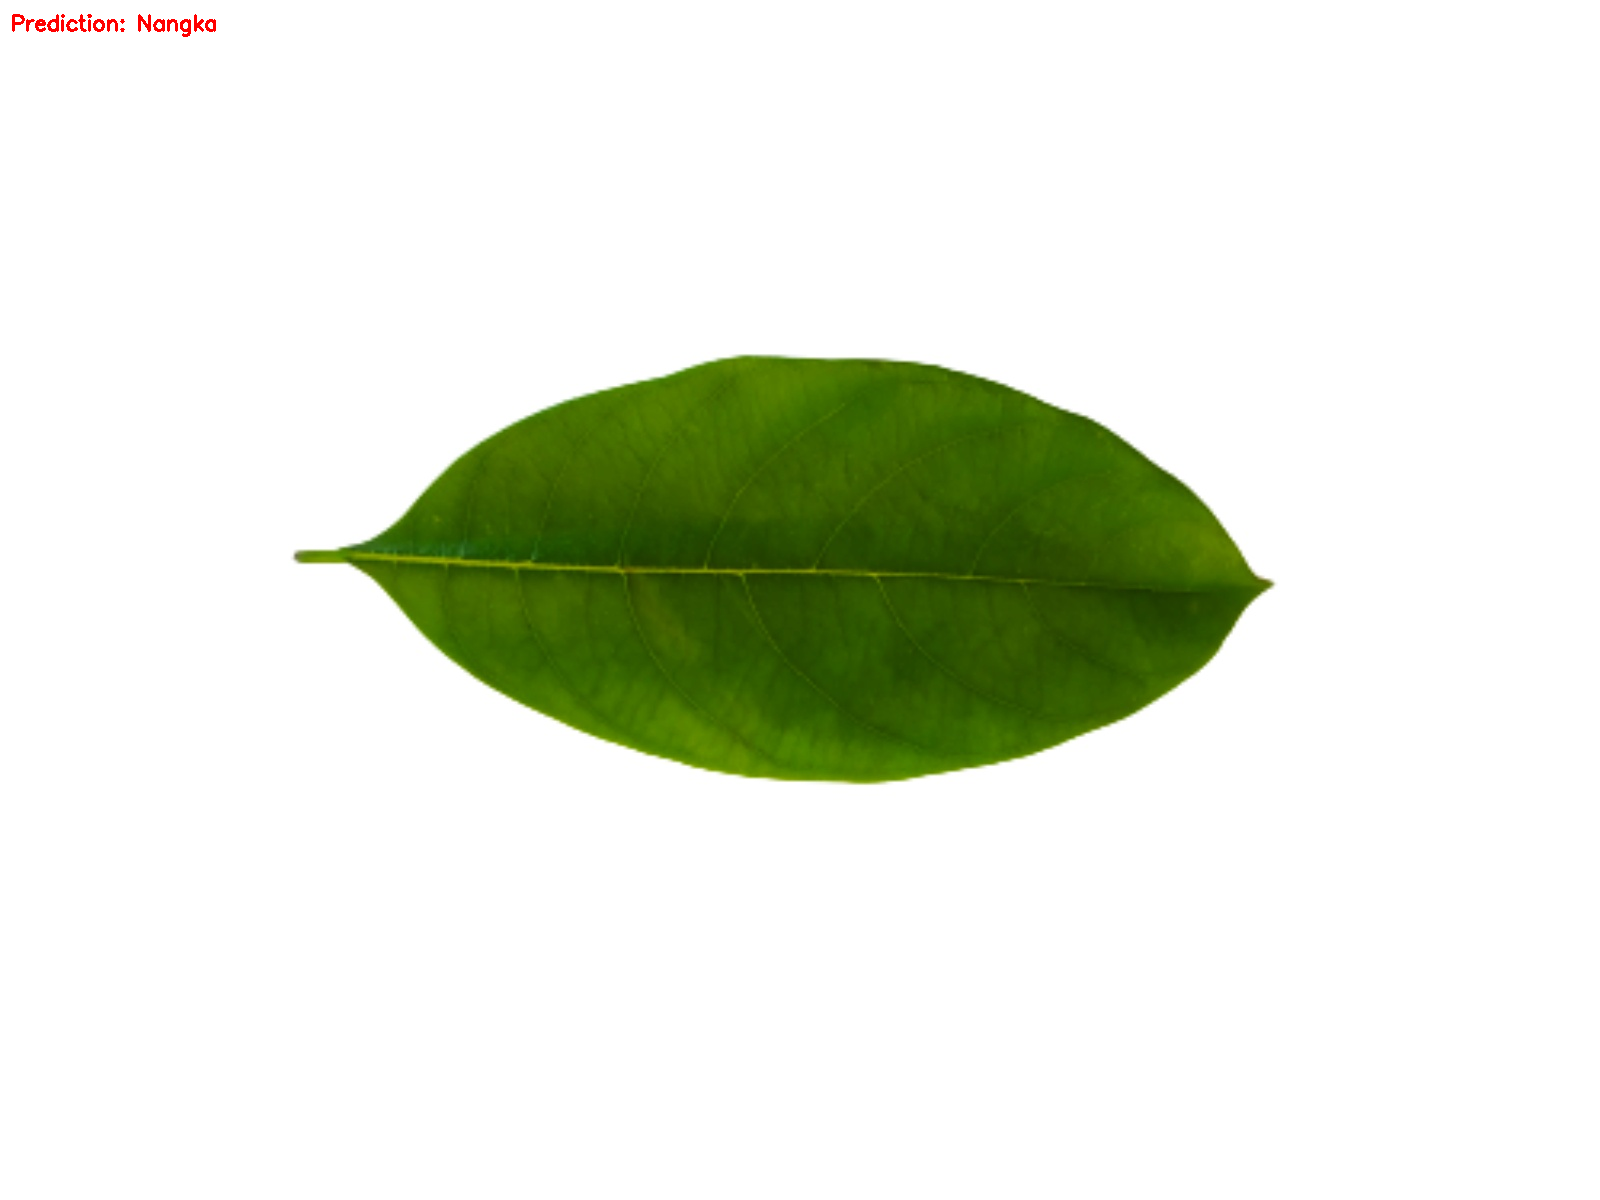


Daun Sirih Test:


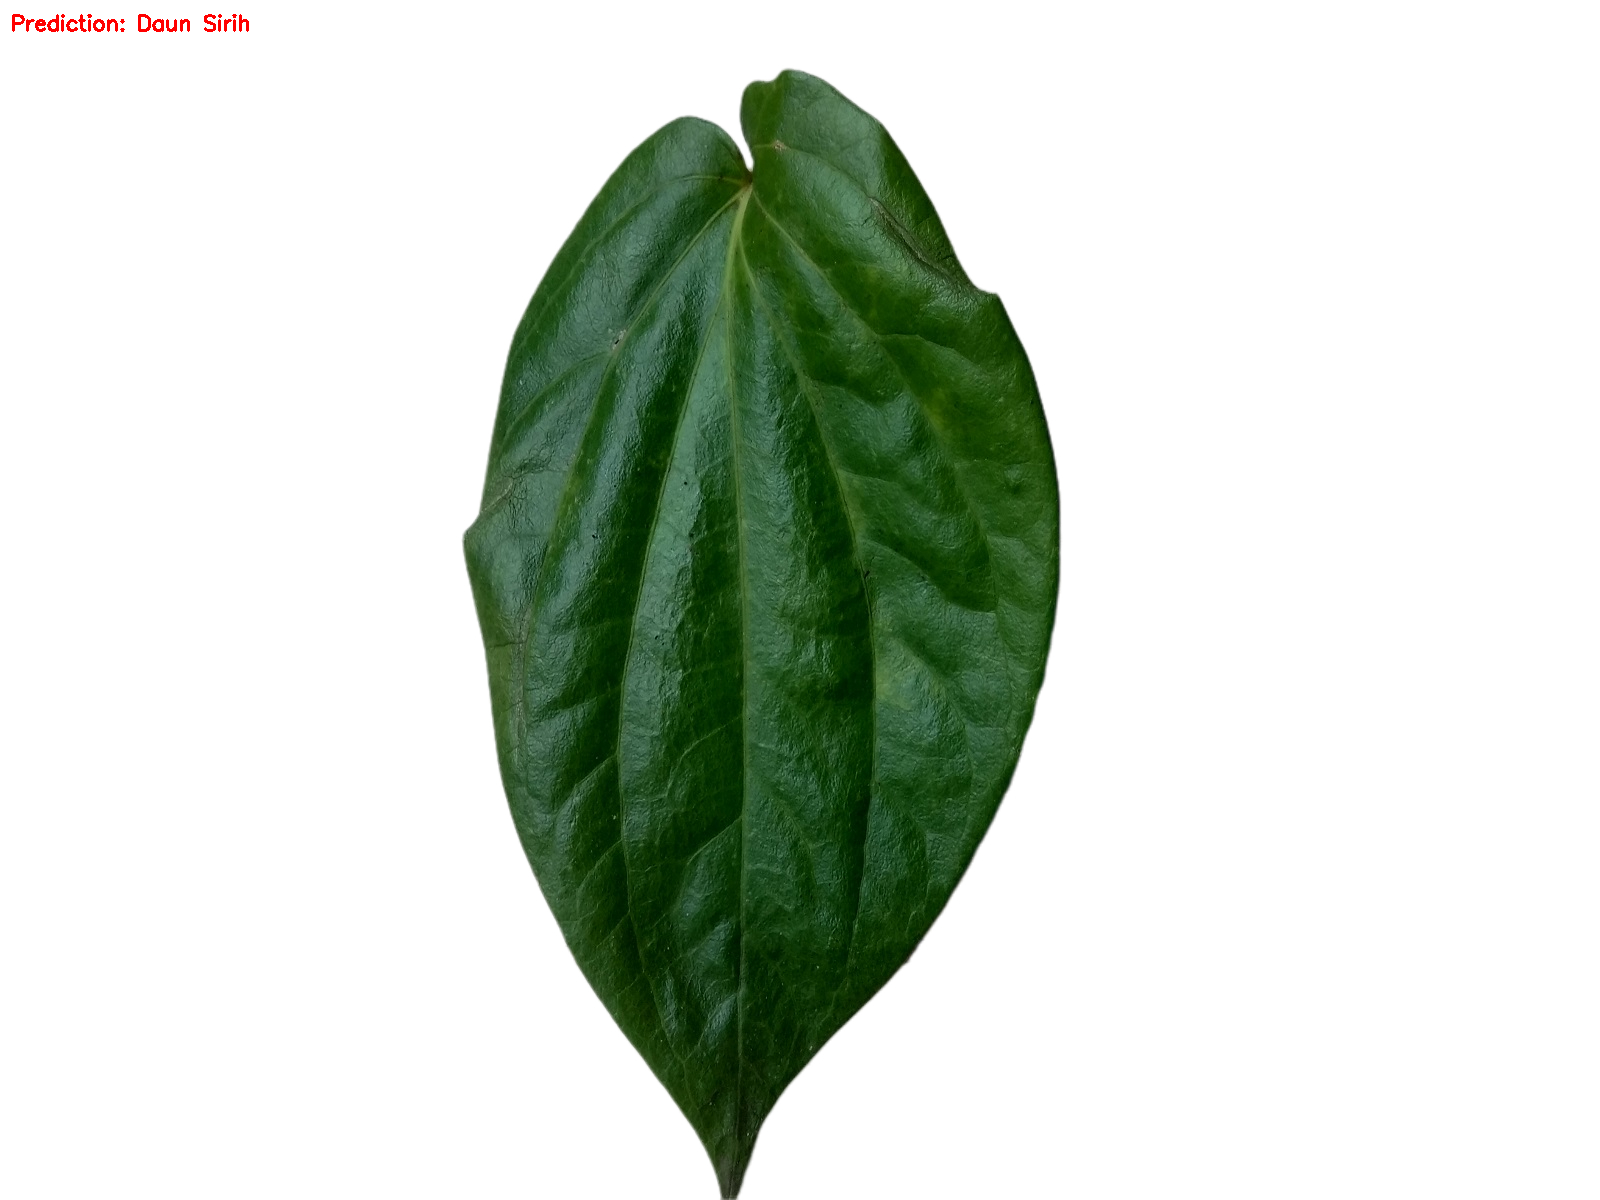

In [50]:
# Test with a "Daun Nangka" image
queryPath_nangka = imagePaths+'/Nangka/019.jpg'
query_nangka = cv2.imread(queryPath_nangka)
output_nangka = query_nangka.copy()
query_nangka_resized = cv2.resize(query_nangka, (32, 32))
q_nangka = []
q_nangka.append(query_nangka_resized)
q_nangka = np.array(q_nangka, dtype='float') / 255.0

q_pred_nangka = model.predict(q_nangka)

if q_pred_nangka <= 0.5:
    target_nangka = "Daun Sirih"
else:
    target_nangka = "Nangka"
text_nangka = "Prediction: {}".format(target_nangka)
cv2.putText(output_nangka, text_nangka, (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 0, 255), 2)

# Test with a "Daun Sirih" image
queryPath_sirih = imagePaths+'/Daun Sirih/019.jpg'
query_sirih = cv2.imread(queryPath_sirih)
output_sirih = query_sirih.copy()
query_sirih_resized = cv2.resize(query_sirih, (32, 32))
q_sirih = []
q_sirih.append(query_sirih_resized)
q_sirih = np.array(q_sirih, dtype='float') / 255.0

q_pred_sirih = model.predict(q_sirih)

if q_pred_sirih <= 0.5:
    target_sirih = "Daun Sirih"
else:
    target_sirih = "Nangka"
text_sirih = "Prediction: {}".format(target_sirih)
cv2.putText(output_sirih, text_sirih, (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 0, 255), 2)

# Display both images
print("Daun Nangka Test:")
from google.colab.patches import cv2_imshow
cv2_imshow(output_nangka)

print("\nDaun Sirih Test:")
cv2_imshow(output_sirih)

In [66]:
# ====================================================
# 📦 Import Library
# ====================================================
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer, Flatten, Dense, Conv2D, MaxPool2D, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import cv2, glob
import matplotlib.pyplot as plt
from google.colab import drive
from google.colab.patches import cv2_imshow


In [67]:
# ====================================================
# 🔗 Mount Google Drive
# ====================================================
drive.mount('/content/drive')

# Ganti path dataset sesuai lokasi di Drive kamu
imagePaths = '/content/drive/MyDrive/Uas/DatasetDaun'
label_list = ['Nangka', 'Daun Sirih']


Mounted at /content/drive


In [68]:
# ====================================================
# 🖼️ Load Dataset
# ====================================================
data, labels = [], []

for label in label_list:
    image_dir = f"{imagePaths}/{label}/*.jpg"
    print(f"📂 Mengambil gambar dari: {image_dir}")
    for imagePath in glob.glob(image_dir):
        image = cv2.imread(imagePath)
        image = cv2.resize(image, (32, 32))
        data.append(image)
        labels.append(label)

# Normalisasi data
data = np.array(data, dtype='float') / 255.0
labels = np.array(labels)


📂 Mengambil gambar dari: /content/drive/MyDrive/Uas/DatasetDaun/Nangka/*.jpg
📂 Mengambil gambar dari: /content/drive/MyDrive/Uas/DatasetDaun/Daun Sirih/*.jpg


In [69]:
# ====================================================
# 🔢 Encode Label & Split Data
# ====================================================
lb = LabelEncoder()
labels = lb.fit_transform(labels)

x_train, x_test, y_train, y_test = train_test_split(
    data, labels, test_size=0.2, random_state=42
)


In [70]:
# ====================================================
# 🧠 Model CNN (Baseline)
# ====================================================
def build_cnn():
    model = Sequential()
    model.add(InputLayer(input_shape=[32, 32, 3]))
    model.add(Conv2D(32, (2,2), activation='relu', padding='same'))
    model.add(MaxPool2D(pool_size=2, padding='same'))
    model.add(Conv2D(50, (2,2), activation='relu', padding='same'))
    model.add(MaxPool2D(pool_size=2, padding='same'))
    model.add(Dropout(0.25))
    model.add(Flatten())
    model.add(Dense(512, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(1, activation='sigmoid'))
    return model


In [71]:
# ====================================================
# 🏋️ Training Model Awal (Tanpa Augmentasi)
# ====================================================
model1 = build_cnn()
model1.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])
print("\n🚀 Training model tanpa augmentasi...\n")
H1 = model1.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=40, batch_size=32, verbose=1)


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(



🚀 Training model tanpa augmentasi...

Epoch 1/40
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 203ms/step - accuracy: 0.5580 - loss: 0.7100 - val_accuracy: 0.3810 - val_loss: 1.1265
Epoch 2/40
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step - accuracy: 0.4712 - loss: 1.0250 - val_accuracy: 0.6667 - val_loss: 0.5201
Epoch 3/40
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step - accuracy: 0.6644 - loss: 0.5677 - val_accuracy: 0.3810 - val_loss: 0.7447
Epoch 4/40
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step - accuracy: 0.6033 - loss: 0.6092 - val_accuracy: 0.8095 - val_loss: 0.4757
Epoch 5/40
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step - accuracy: 0.8859 - loss: 0.4304 - val_accuracy: 0.8571 - val_loss: 0.3740
Epoch 6/40
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step - accuracy: 0.8881 - loss: 0.3750 - val_accuracy: 0.9048 - val_loss: 0.3449
Epoch 7/40
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step - accuracy: 0.8937 - loss: 0.3222 - val_accuracy: 0.8095 - val_loss: 0.3615
Epoch 8/40
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step - accuracy: 0.9021 - loss: 0.2362 - 

In [72]:
# ====================================================
# 🧩 Training Model dengan Algoritma Baru: Image Augmentation
# ====================================================
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.15,
    zoom_range=0.15,
    horizontal_flip=True,
    fill_mode='nearest'
)
datagen.fit(x_train)

model2 = build_cnn()
model2.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])
print("\n🚀 Training model dengan augmentasi data...\n")
H2 = model2.fit(datagen.flow(x_train, y_train, batch_size=32),
                validation_data=(x_test, y_test),
                epochs=40,
                steps_per_epoch=len(x_train)//32,
                verbose=1)



🚀 Training model dengan augmentasi data...

Epoch 1/40


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 529ms/step - accuracy: 0.5653 - loss: 0.6932 - val_accuracy: 0.6190 - val_loss: 0.6385
Epoch 2/40
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step - accuracy: 0.4375 - loss: 0.6931 - val_accuracy: 0.9048 - val_loss: 0.6519
Epoch 3/40
1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step - accuracy: 0.6250 - loss: 0.6869

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/epoch_iterator.py:116: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 148ms/step - accuracy: 0.5621 - loss: 0.7067 - val_accuracy: 0.3810 - val_loss: 0.7097
Epoch 4/40
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step - accuracy: 0.6875 - loss: 0.6434 - val_accuracy: 0.3810 - val_loss: 0.6701
Epoch 5/40
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step - accuracy: 0.4834 - loss: 0.6906 - val_accuracy: 0.9048 - val_loss: 0.5810
Epoch 6/40
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step - accuracy: 0.7188 - loss: 0.6229 - val_accuracy: 0.9048 - val_loss: 0.5708
Epoch 7/40
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 150ms/step - accuracy: 0.6783 - loss: 0.6436 - val_accuracy: 0.8095 - val_loss: 0.5600
Epoch 8/40
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step - accuracy: 0.7500 - loss: 0.6154 - val_accuracy: 0.7143 - val_loss: 0.5729
Epoch 9/40
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 151ms/step - accuracy: 0.6723 - loss: 0.6018 - val_accuracy: 0.8095 - val_loss: 0.5015
Epoch 10/40
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step - accuracy: 0.8125 - loss: 0.5549 - val_accuracy: 0.8095 - val_loss: 0.4876
Epoch 

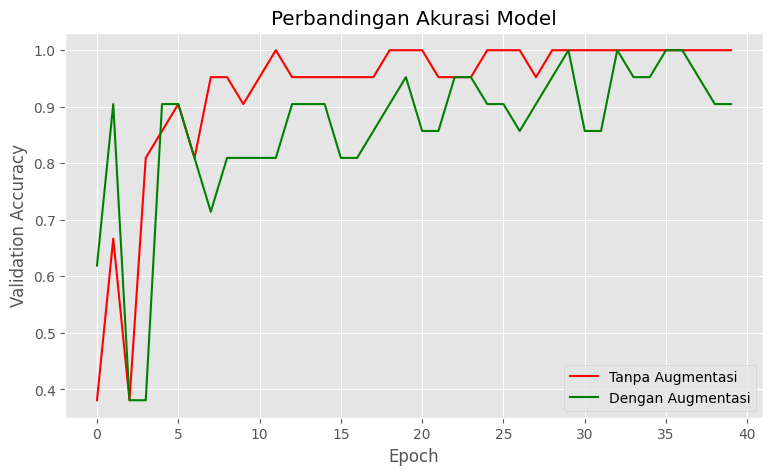

In [73]:
# ====================================================
# 📊 Visualisasi Perbandingan Akurasi
# ====================================================
plt.figure(figsize=(9,5))
plt.plot(H1.history['val_accuracy'], label='Tanpa Augmentasi', color='red')
plt.plot(H2.history['val_accuracy'], label='Dengan Augmentasi', color='green')
plt.title('Perbandingan Akurasi Model')
plt.xlabel('Epoch')
plt.ylabel('Validation Accuracy')
plt.legend()
plt.grid(True)
plt.show()


In [74]:
# ====================================================
# 🧮 Evaluasi Model
# ====================================================
print("\n📈 Hasil Model Tanpa Augmentasi:")
pred1 = (model1.predict(x_test) > 0.5).astype(int)
print(classification_report(y_test, pred1, target_names=label_list))

print("\n📈 Hasil Model Dengan Augmentasi:")
pred2 = (model2.predict(x_test) > 0.5).astype(int)
print(classification_report(y_test, pred2, target_names=label_list))



📈 Hasil Model Tanpa Augmentasi:
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step
              precision    recall  f1-score   support

      Nangka       1.00      1.00      1.00         8
  Daun Sirih       1.00      1.00      1.00        13

    accuracy                           1.00        21
   macro avg       1.00      1.00      1.00        21
weighted avg       1.00      1.00      1.00        21


📈 Hasil Model Dengan Augmentasi:
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step
              precision    recall  f1-score   support

      Nangka       0.80      1.00      0.89         8
  Daun Sirih       1.00      0.85      0.92        13

    accuracy                           0.90        21
   macro avg       0.90      0.92      0.90        21
weighted avg       0.92      0.90      0.91        21




🔎 Uji Gambar Daun Nangka:


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 149ms/step


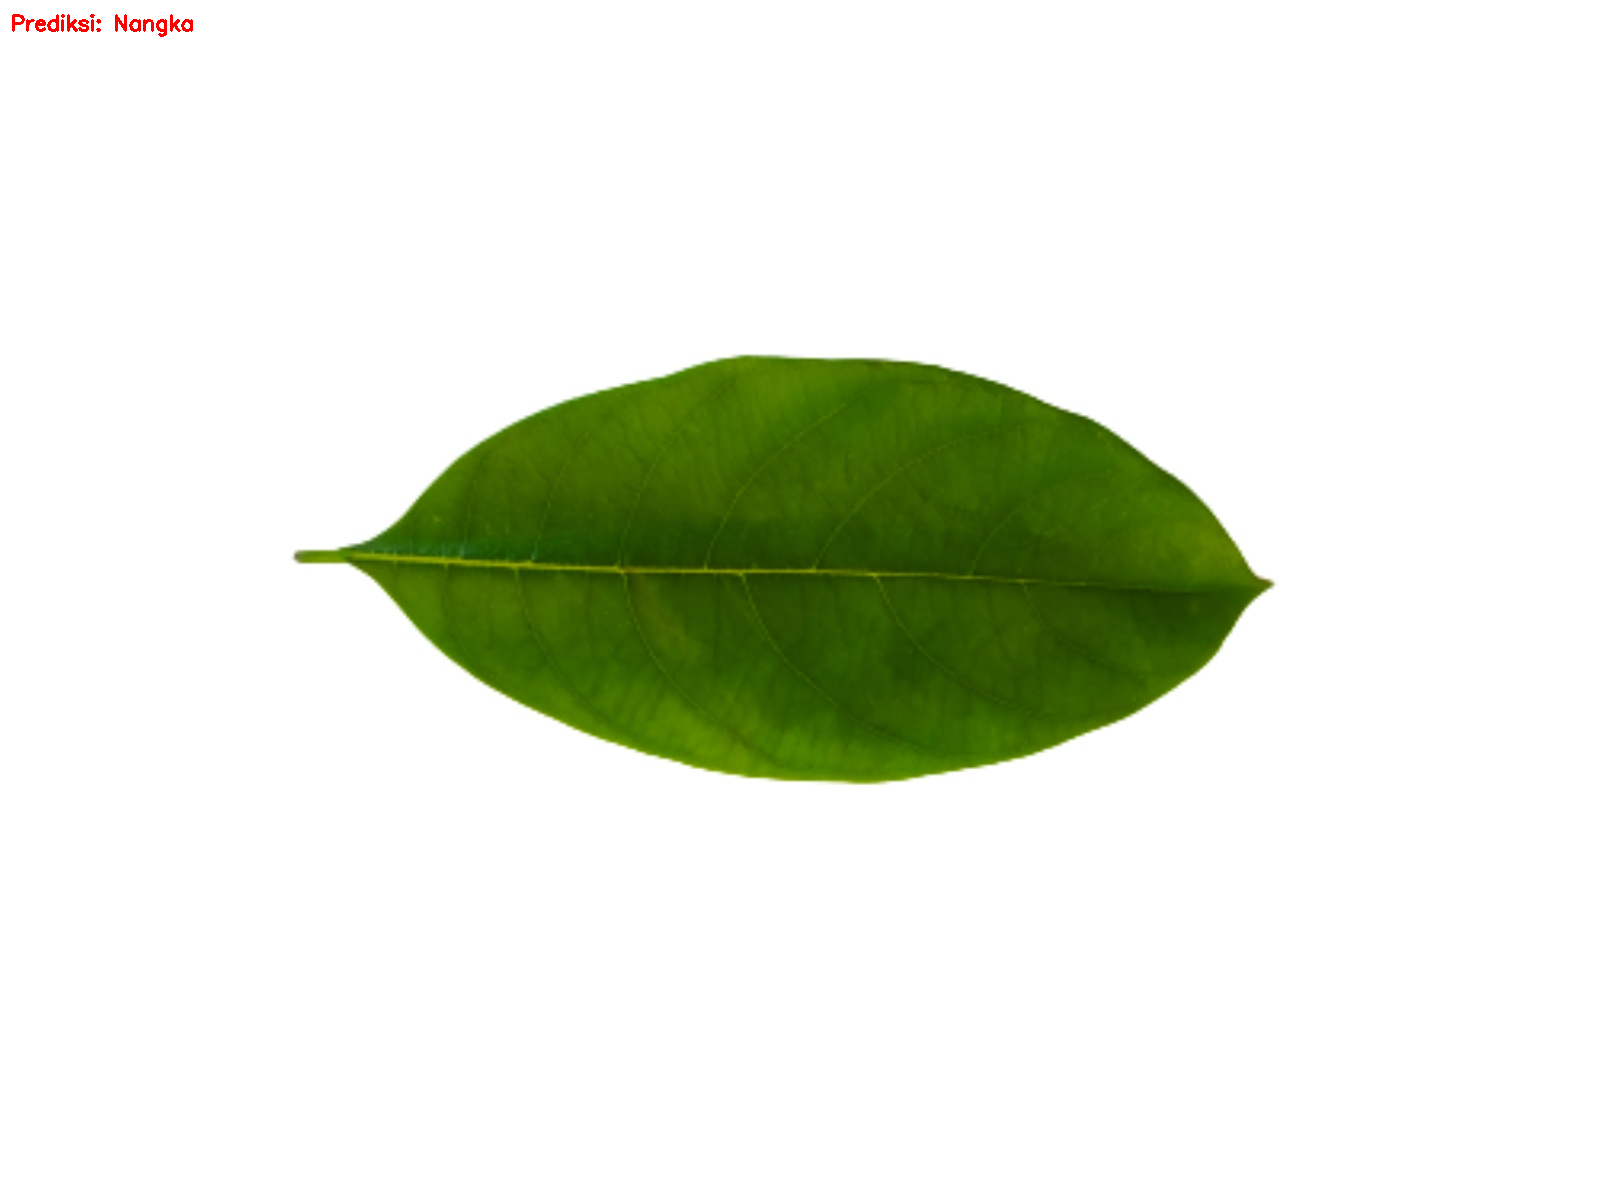

Prediksi: Nangka

🔎 Uji Gambar Daun Sirih:
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


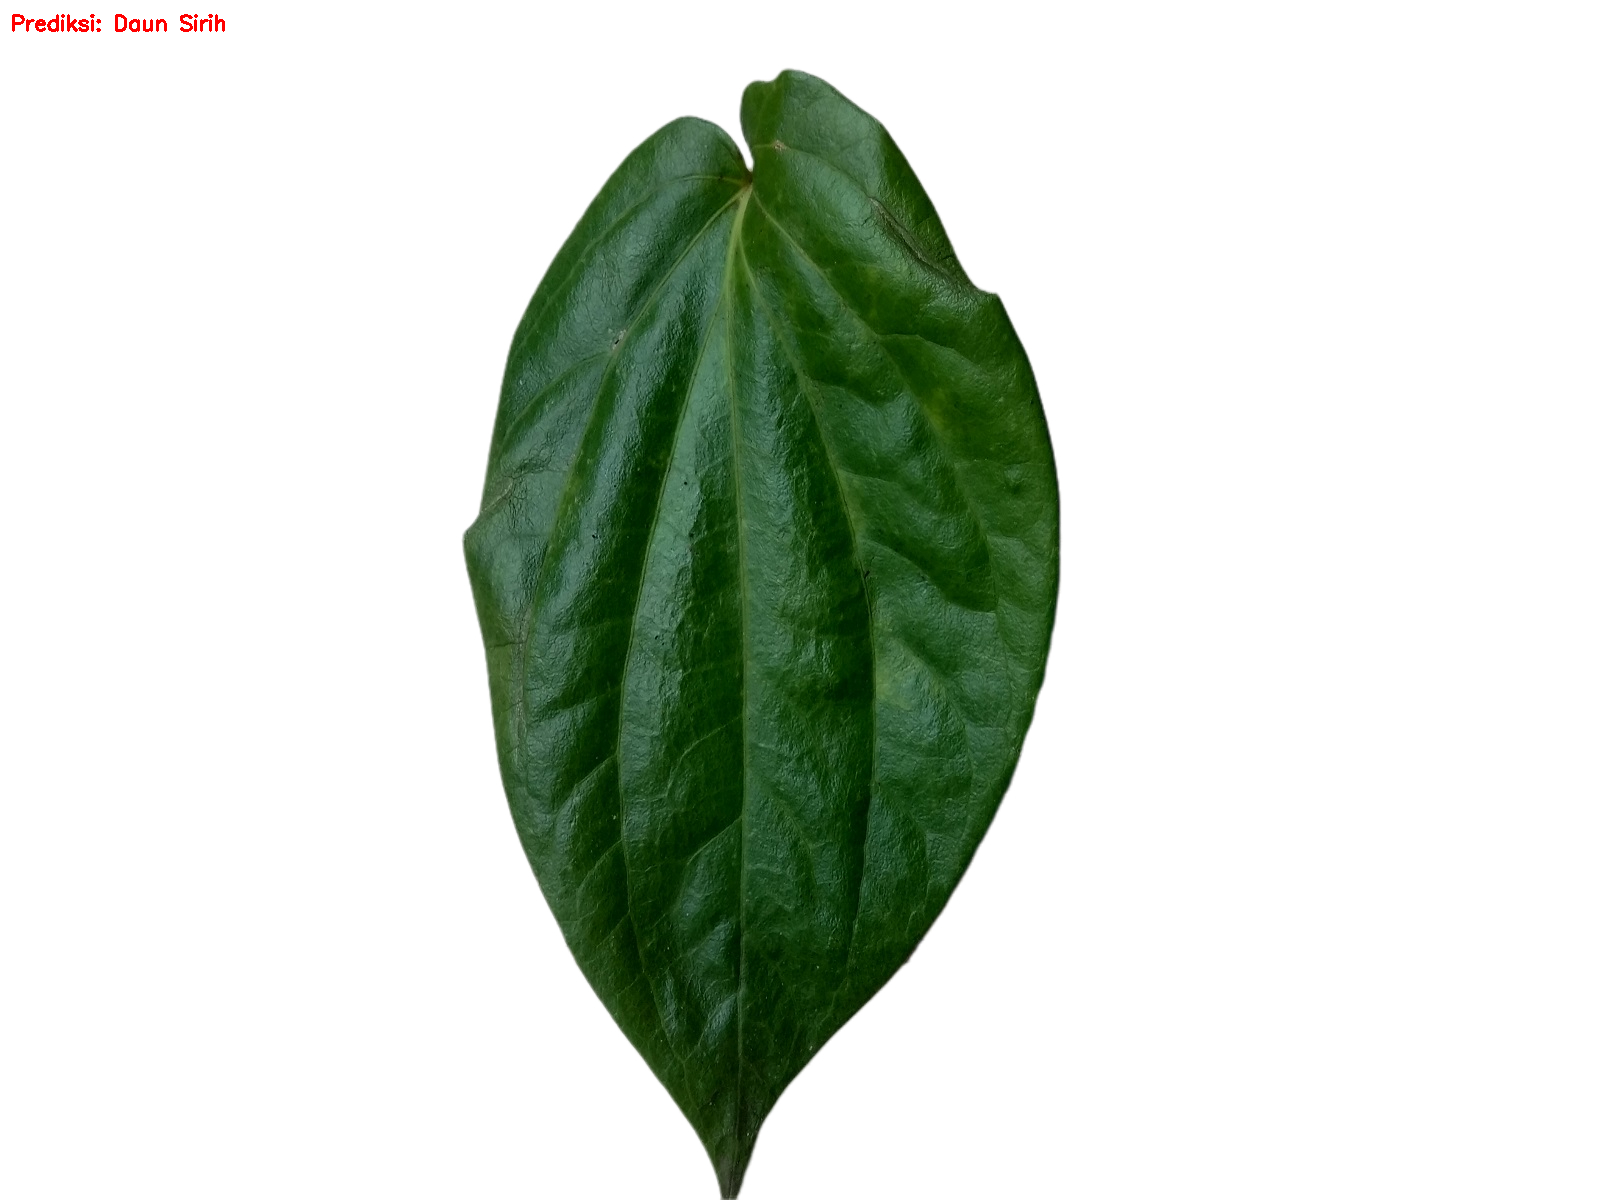

Prediksi: Daun Sirih


In [75]:
# ====================================================
# 🔍 Uji Model Terbaik dengan Gambar Baru
# ====================================================
def predict_image(model, img_path):
    img = cv2.imread(img_path)
    output = img.copy()
    img = cv2.resize(img, (32, 32))
    img = np.array([img], dtype='float') / 255.0
    pred = model.predict(img)
    label_pred = "Nangka" if pred > 0.5 else "Daun Sirih"
    cv2.putText(output, f"Prediksi: {label_pred}", (10, 30),
                cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 0, 255), 2)
    cv2_imshow(output)
    print("Prediksi:", label_pred)

print("\n🔎 Uji Gambar Daun Nangka:")
predict_image(model2, f"{imagePaths}/Nangka/019.jpg")

print("\n🔎 Uji Gambar Daun Sirih:")
predict_image(model2, f"{imagePaths}/Daun Sirih/019.jpg")


In [ ]:
# model.save('image_classification.h5')